<a href="https://colab.research.google.com/github/h4cktivist/hse-linear-models-final/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_clients = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_clients.csv')
df_close_loan = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_close_loan.csv')
df_job = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_job.csv')
df_last_credit = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_last_credit.csv')
df_loan = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_loan.csv')
df_pens = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_pens.csv')
df_salary = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_salary.csv')
df_target = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_target.csv')
df_work = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_work.csv')

### 📁 Предобработка представленных данных

In [ ]:
for df in [df_clients, df_close_loan, df_job, df_last_credit, df_loan, df_pens, df_salary, df_target, df_work]:
    df.info()
    print('---------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       16000 non-null  int64 
 1   AGE                      16000 non-null  int64 
 2   GENDER                   16000 non-null  int64 
 3   EDUCATION                16000 non-null  object
 4   MARITAL_STATUS           16000 non-null  object
 5   CHILD_TOTAL              16000 non-null  int64 
 6   DEPENDANTS               16000 non-null  int64 
 7   SOCSTATUS_WORK_FL        16000 non-null  int64 
 8   SOCSTATUS_PENS_FL        16000 non-null  int64 
 9   REG_ADDRESS_PROVINCE     16000 non-null  object
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object
 12  FL_PRESENCE_FL           16000 non-null  int64 
 13  OWN_AUTO                 16000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

In [ ]:
df_clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,Чувашия,Чувашия,0,0
15996,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,Карелия,Карелия,0,0
15997,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0
15998,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0


In [ ]:
df_target

,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0
...,...,...,...
15218,75291424,106819588,0
15219,75291888,106819589,0
15220,75291923,106819590,0
15221,75291960,106819591,0


In [ ]:
df_clients = df_clients.rename(columns={'ID': 'ID_CLIENT'})

In [ ]:
df = pd.merge(df_target, df_clients, on='ID_CLIENT', how='left')

In [ ]:
df

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,59910150,106804370,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0
1,59910230,106804371,0,32,1,Среднее,Состою в браке,3,3,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0
2,59910525,106804372,0,52,1,Неполное среднее,Состою в браке,4,0,1,0,Иркутская область,Иркутская область,Иркутская область,0,0
3,59910803,106804373,0,39,1,Высшее,Состою в браке,1,1,1,0,Ростовская область,Ростовская область,Ростовская область,1,0
4,59911781,106804374,0,30,0,Среднее,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,75291424,106819588,0,25,0,Среднее,Состою в браке,1,1,1,0,Воронежская область,Воронежская область,Воронежская область,0,0
15219,75291888,106819589,0,51,1,Среднее специальное,Состою в браке,2,0,1,0,Башкирия,Башкирия,Башкирия,0,0
15220,75291923,106819590,0,22,1,Среднее,Не состоял в браке,1,1,1,0,Брянская область,Брянская область,Брянская область,0,0
15221,75291960,106819591,0,60,1,Среднее,Вдовец/Вдова,2,0,0,1,Приморский край,Приморский край,Приморский край,1,0


In [ ]:
df_salary

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620
...,...,...,...
15518,от 20000 до 50000 руб.,15000.0,106812538
15519,от 10000 до 20000 руб.,12000.0,106814158
15520,от 10000 до 20000 руб.,14000.0,106805134
15521,от 10000 до 20000 руб.,7000.0,106812867


In [ ]:
df = pd.merge(df, df_salary, on='ID_CLIENT', how='left')

In [ ]:
df_loan

,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373
...,...,...
21121,1753811779,106819588
21122,1753811780,106819589
21123,1753811781,106819590
21124,1753811782,106819591


In [ ]:
df_close_loan

,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1
...,...,...
21121,1753811779,1
21122,1753811780,0
21123,1753811781,0
21124,1753811782,0


In [ ]:
loans = df_loan.merge(df_close_loan, on='ID_LOAN')

In [ ]:
loans

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1
...,...,...,...
21121,1753811779,106819588,1
21122,1753811780,106819589,0
21123,1753811781,106819590,0
21124,1753811782,106819591,0


In [ ]:
aggregated_df = loans.groupby('ID_CLIENT').agg(LOAN_NUM_TOTAL=('ID_LOAN', 'count'),
                                                   LOAN_NUM_CLOSED=('CLOSED_FL', 'sum')).reset_index()

In [ ]:
aggregated_df

,ID_CLIENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106804370,1,1
1,106804371,1,1
2,106804372,2,1
3,106804373,1,1
4,106804374,2,1
...,...,...,...
15218,106819588,3,2
15219,106819589,1,0
15220,106819590,1,0
15221,106819591,1,0


In [ ]:
df = pd.merge(df, aggregated_df, on='ID_CLIENT', how='left')

In [ ]:
df

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,FAMILY_INCOME,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,106804370,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,от 10000 до 20000 руб.,5000.0,1,1
1,59910150,106804370,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,от 10000 до 20000 руб.,5000.0,1,1
2,59910230,106804371,0,32,1,Среднее,Состою в браке,3,3,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,от 10000 до 20000 руб.,12000.0,1,1
3,59910525,106804372,0,52,1,Неполное среднее,Состою в браке,4,0,1,0,Иркутская область,Иркутская область,Иркутская область,0,0,от 10000 до 20000 руб.,9000.0,2,1
4,59910803,106804373,0,39,1,Высшее,Состою в браке,1,1,1,0,Ростовская область,Ростовская область,Ростовская область,1,0,от 20000 до 50000 руб.,25000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424,106819588,0,25,0,Среднее,Состою в браке,1,1,1,0,Воронежская область,Воронежская область,Воронежская область,0,0,от 10000 до 20000 руб.,12000.0,3,2
15519,75291888,106819589,0,51,1,Среднее специальное,Состою в браке,2,0,1,0,Башкирия,Башкирия,Башкирия,0,0,от 20000 до 50000 руб.,10000.0,1,0
15520,75291923,106819590,0,22,1,Среднее,Не состоял в браке,1,1,1,0,Брянская область,Брянская область,Брянская область,0,0,от 5000 до 10000 руб.,6000.0,1,0
15521,75291960,106819591,0,60,1,Среднее,Вдовец/Вдова,2,0,0,1,Приморский край,Приморский край,Приморский край,1,0,от 10000 до 20000 руб.,4500.0,1,0


In [ ]:
df = df.drop(['FAMILY_INCOME', 'MARITAL_STATUS', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'EDUCATION', 'ID_CLIENT'], axis=1)
df = df.drop_duplicates()
df = df.dropna()

In [ ]:
df

,AGREEMENT_RK,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,0,49,1,2,1,1,0,0,0,5000.0,1,1
2,59910230,0,32,1,3,3,1,0,0,0,12000.0,1,1
3,59910525,0,52,1,4,0,1,0,0,0,9000.0,2,1
4,59910803,0,39,1,1,1,1,0,1,0,25000.0,1,1
5,59911781,0,30,0,0,0,1,0,0,0,12000.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424,0,25,0,1,1,1,0,0,0,12000.0,3,2
15519,75291888,0,51,1,2,0,1,0,0,0,10000.0,1,0
15520,75291923,0,22,1,1,1,1,0,0,0,6000.0,1,0
15521,75291960,0,60,1,2,0,0,1,1,0,4500.0,1,0


### 📈 Анализ данных

In [ ]:
df.describe()

,AGREEMENT_RK,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
count,1.522300e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,6.540183e+07,0.119030,40.406096,0.654536,1.099389,0.645208,0.909610,0.134468,0.309794,0.116337,13853.836323,1.387769,0.751889
std,4.568181e+06,0.323835,11.601068,0.475535,0.995411,0.812252,0.286748,0.341165,0.462424,0.320844,9015.467617,0.793566,0.988499
min,5.991015e+07,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000
25%,6.192092e+07,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
50%,6.437100e+07,0.000000,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12000.000000,1.000000,0.000000
75%,6.708802e+07,0.000000,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,17000.000000,2.000000,1.000000
max,7.529224e+07,1.000000,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,250000.000000,11.000000,11.000000


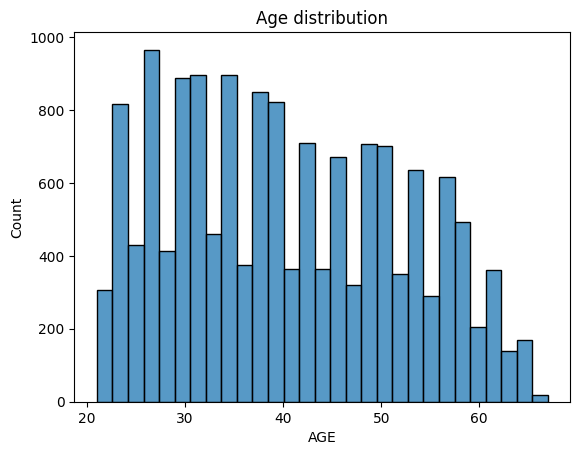

In [ ]:
sns.histplot(df['AGE'])
plt.title('Age distribution')
plt.show()

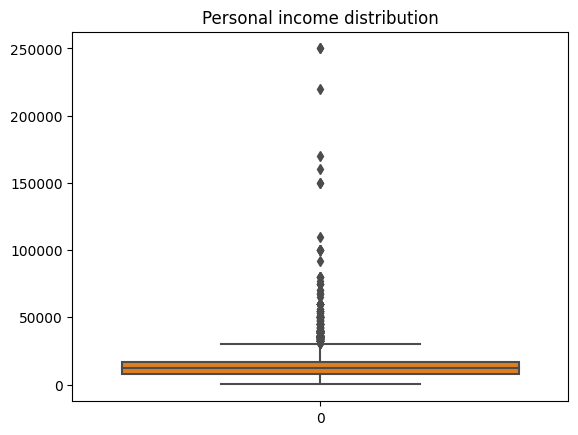

In [ ]:
sns.boxplot(df['PERSONAL_INCOME'], palette='autumn')
plt.title('Personal income distribution')
plt.show()

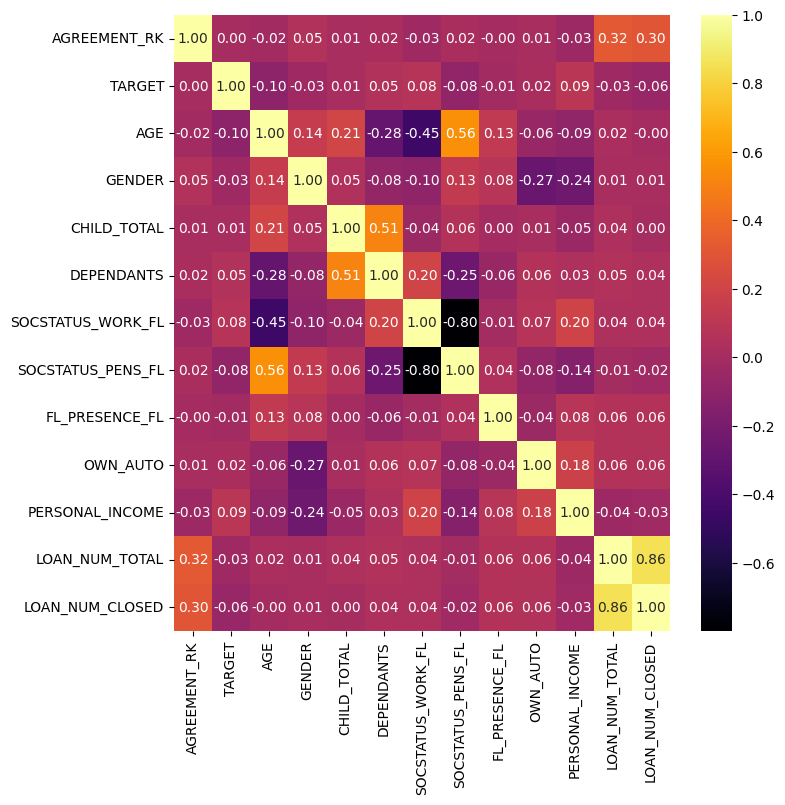

In [ ]:
corr = df[[col for col in df.columns]].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='inferno')
plt.show()

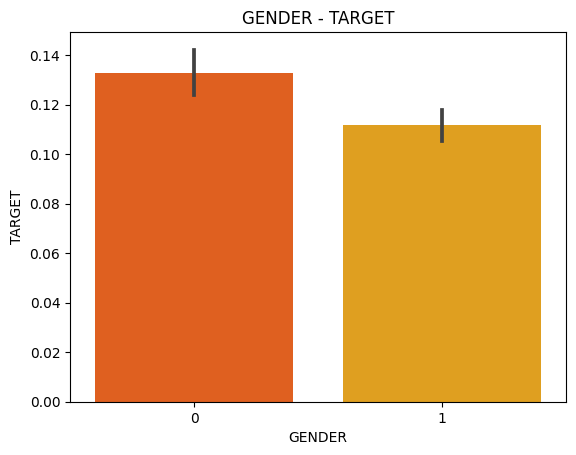

In [ ]:
sns.barplot(x='GENDER', y='TARGET', data = df, palette='autumn')
plt.title('GENDER - TARGET')
plt.show()

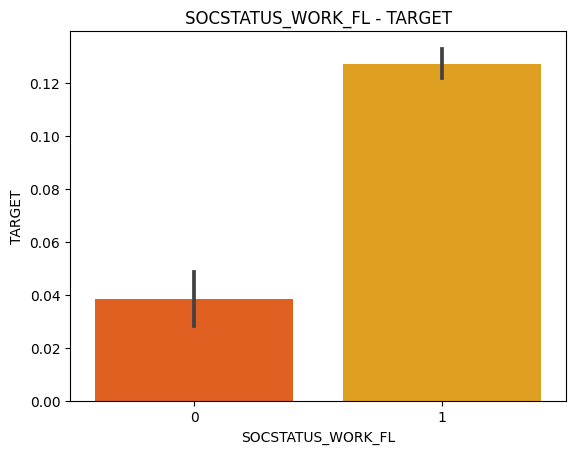

In [ ]:
sns.barplot(x='SOCSTATUS_WORK_FL', y='TARGET', data = df, palette='autumn')
plt.title('SOCSTATUS_WORK_FL - TARGET')
plt.show()

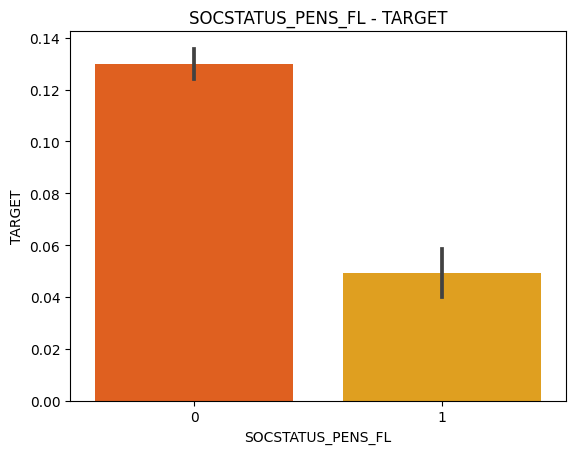

In [ ]:
sns.barplot(x='SOCSTATUS_PENS_FL', y='TARGET', data = df, palette='autumn')
plt.title('SOCSTATUS_PENS_FL - TARGET')
plt.show()

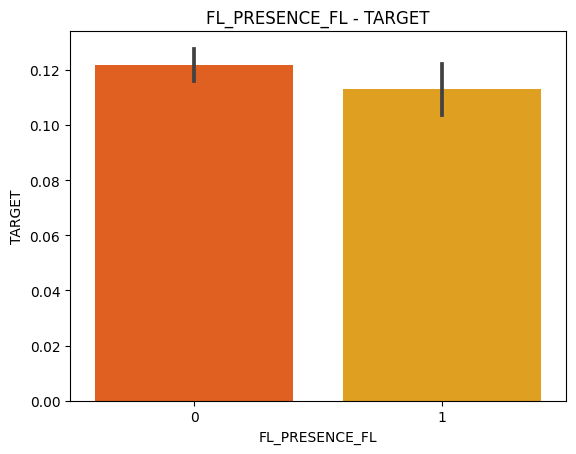

In [ ]:
sns.barplot(x='FL_PRESENCE_FL', y='TARGET', data = df, palette='autumn')
plt.title('FL_PRESENCE_FL - TARGET')
plt.show()

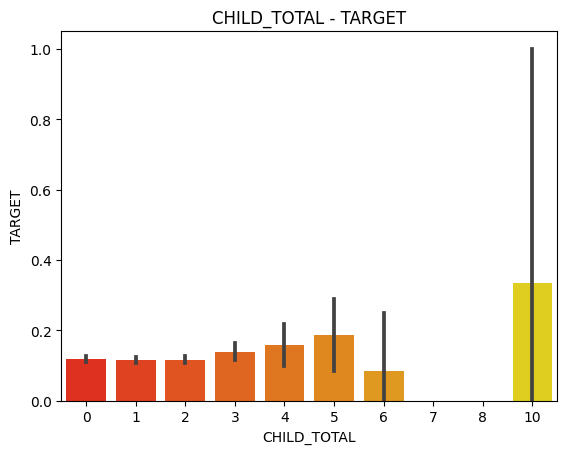

In [ ]:
sns.barplot(x='CHILD_TOTAL', y='TARGET', data = df, palette='autumn')
plt.title('CHILD_TOTAL - TARGET')
plt.show()

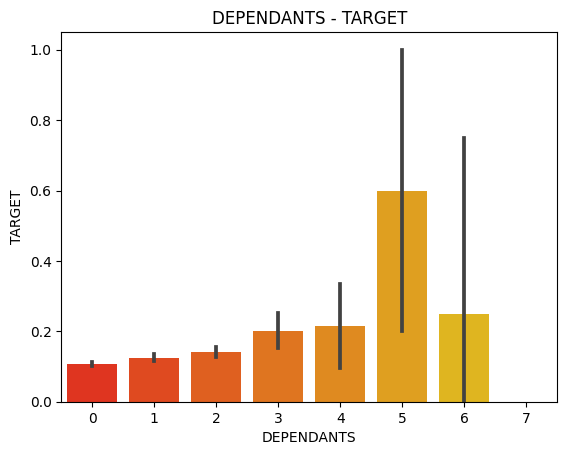

In [ ]:
sns.barplot(x='DEPENDANTS', y='TARGET', data = df, palette='autumn')
plt.title('DEPENDANTS - TARGET')
plt.show()

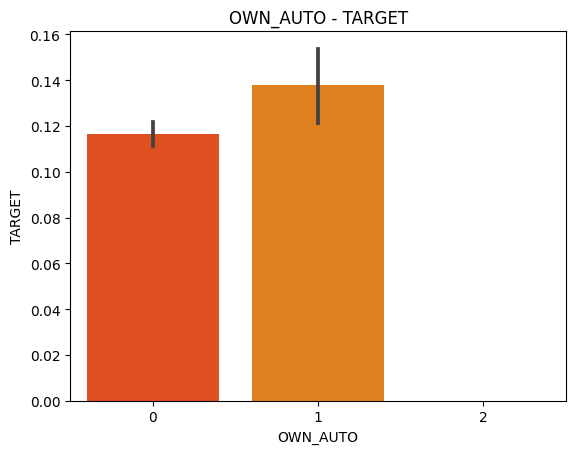

In [ ]:
sns.barplot(x='OWN_AUTO', y='TARGET', data = df, palette='autumn')
plt.title('OWN_AUTO - TARGET')
plt.show()

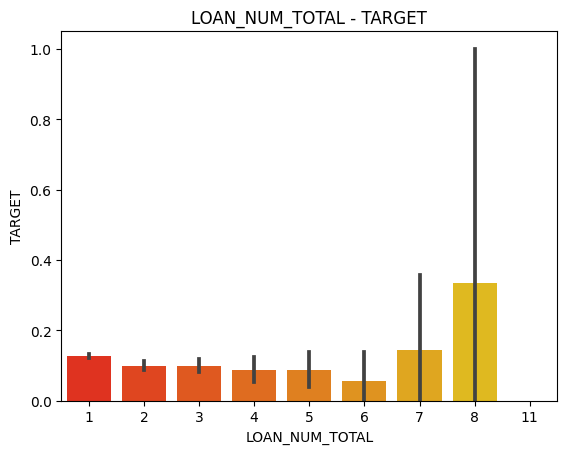

In [ ]:
sns.barplot(x='LOAN_NUM_TOTAL', y='TARGET', data = df, palette='autumn')
plt.title('LOAN_NUM_TOTAL - TARGET')
plt.show()

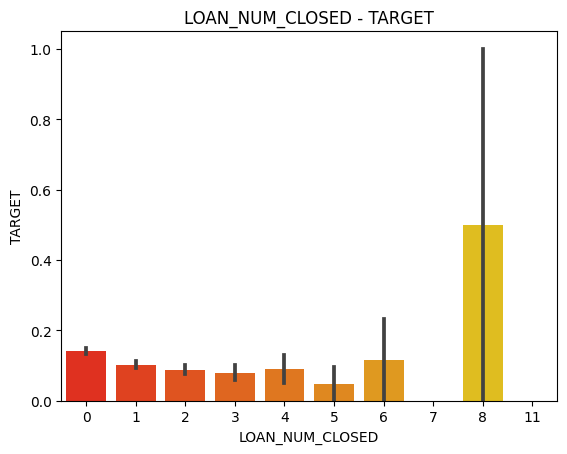

In [ ]:
sns.barplot(x='LOAN_NUM_CLOSED', y='TARGET', data = df, palette='autumn')
plt.title('LOAN_NUM_CLOSED - TARGET')
plt.show()